In [29]:
import numpy as np
import torch 
import pyro
import pandas as pd

import seaborn as sns
import importlib
from plotnine import *
import time
import pickle

from granch_utils import init_model_tensor, main_sim_tensor, compute_prob_tensor, init_params_tensor, num_stab_help
#importlib.reload(granch_utils)


NameError: name 'granch_utils' is not defined

In [30]:
importlib.reload(num_stab_help)
BATCH_INFO = {
    "jitter_n": 5, 
    "jitter_mode": "single_end"
}

GRID_INFO = {
    "grid_mu_start": -1, "grid_mu_end": 1, "grid_mu_step": 20, 
    "grid_sigma_start": 0.001, "grid_sigma_end": 1.8, "grid_sigma_step": 20, 
    "grid_y_start": -1, "grid_y_end": 1, "grid_y_step": 20, 
    "grid_epsilon_start": 0.001, "grid_epsilon_end": 1.8, "grid_epsilon_step": 20, 
    "hypothetical_obs_grid_n": 10
}

BATCH_GRID_INFO = num_stab_help.get_batch_grid(BATCH_INFO, GRID_INFO)

PRIOR_INFO = {
    "mu_prior": 0.001,  
    "V_prior": 0.001, 
    "alpha_prior": 1, 
    "beta_prior": 1, 
    "epsilon": 0.000001, "mu_epsilon": 0.001, "sd_epsilon": 4, 
    "hypothetical_obs_grid_n": 10, 
    "world_EIGs": 0.0001, "max_observation": 500
}

STIMULI_INFO = init_model_tensor.granch_stimuli(1, 'BBBBBB')

res = num_stab_help.run_all_sim(BATCH_GRID_INFO, PRIOR_INFO, STIMULI_INFO)
res

KeyboardInterrupt: 

In [5]:
res  = num_stab_help.run_multiple_summary(2, 5)
with open('my_object.pickle', 'wb') as f:
    pickle.dump(res, f)

0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2895.)


KeyboardInterrupt: 

In [6]:
with open('sim_res.pickle', 'wb') as f:
    pickle.dump(res, f)

NameError: name 'res' is not defined

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.


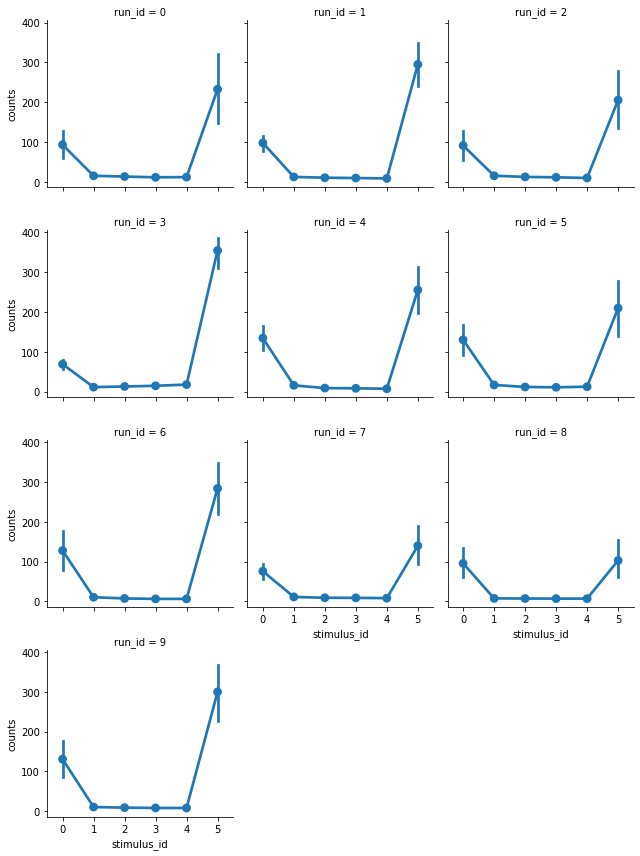

In [24]:
import pandas as pd
import seaborn as sns
res = pd.read_pickle(r'res.pkl')

ps = sns.FacetGrid(res, col = "run_id", col_wrap = 3)
ps


#ps.map(sns.scatterplot, "stimulus_id", "counts", alpha = .3)
ps.map(sns.pointplot, "stimulus_id", "counts", errorbar = "ci")

<AxesSubplot:xlabel='stimulus_id', ylabel='counts'>

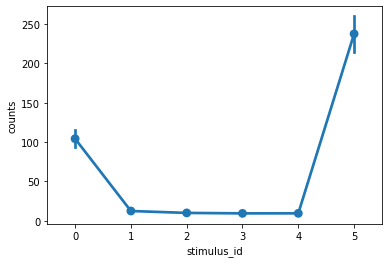

In [8]:
sns.pointplot(data = res, x = "stimulus_id", y = "counts", errorbar = "ci")